In [48]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
%matplotlib notebook

image = mpimg.imread('sample.jpg')

def color_thresh(img, rgb_thresh=(0, 0, 0)):
    # Create an empty array the same size in x and y as the image 
    color_select = np.zeros_like(img[:,:,0])
    above_thresh = (img[:,:,0] > rgb_thresh[0]) & (img[:,:,1] > rgb_thresh[1]) & (img[:,:,2] > rgb_thresh[2])
    color_select[above_thresh] = 1
    return color_select
    
def perspect_transform(img):
    dst_size = 5 
    bottom_offset= 5
    src = np.float32([[13, 140], 
                 [302, 140], 
                 [201, 96],
                 [118, 96] 
                 ])
    dst = np.float32([[image.shape[1]/2 - dst_size, image.shape[0] - bottom_offset],
                 [image.shape[1]/2 + dst_size, image.shape[0] - bottom_offset], 
                 [image.shape[1]/2 + dst_size, image.shape[0] - bottom_offset - dst_size*2], 
                 [image.shape[1]/2 - dst_size, image.shape[0] - bottom_offset - dst_size*2]]
                 )
    # Get transform matrix using cv2.getPerspectivTransform()
    M = cv2.getPerspectiveTransform(src, dst)
    # Warp image using cv2.warpPerspective()
    # keep same size as input image
    warped = cv2.warpPerspective(img, M, (img.shape[1], img.shape[0]))
    # Return the result
    return warped

First, we get all non-zero values for each dimension with the nonzero() method. It returns a tuple of arrays, one for each dimension, so we get one array for xpos and ypos.

We switch x and y to get the 90° Rotation.

 - For x, we subtract the image height from the positions. We multiply with -1 to mirror the image vertically
 - For y, we subtract the image width from the positions. We multipy with -1 to mirror the image horizontally

[163 163 163 ..., 163 164 165]
[ 76  77  78 ..., 155 155 155]
[-3. -3. -3. ..., -3. -4. -5.]


<IPython.core.display.Javascript object>


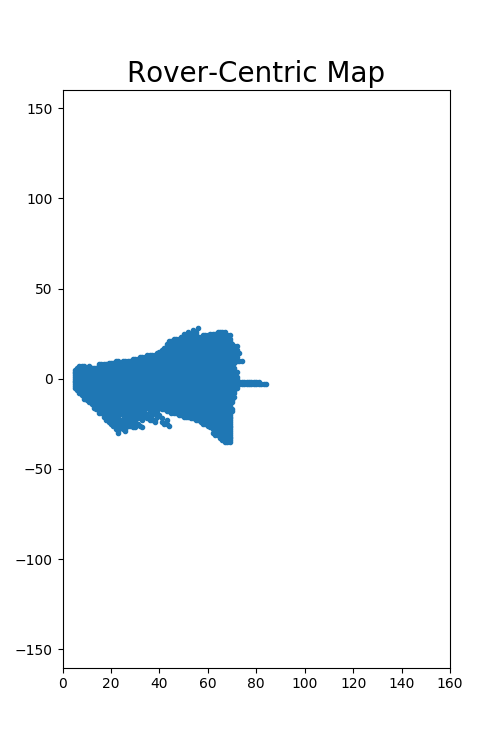

In [65]:
def rover_coords(img):
    # Identify nonzero pixels
    ypos, xpos = img.nonzero()
    print(xpos)
    print(ypos)
    # Calculate pixel positions with reference to the rover 
    # position being at the center bottom of the image.  
    x_pixel = -(ypos - img.shape[0]).astype(np.float)
    y_pixel = -(xpos - img.shape[1]/2 ).astype(np.float)
    return x_pixel, y_pixel



# pixels below the thresholds

warped = perspect_transform(image)
colorsel = color_thresh(warped, rgb_thresh=(160, 180, 160))
xpix, ypix = rover_coords(colorsel)
print(ypix)

# Plot the map in rover-centric coords
fig = plt.figure(figsize=(5, 7.5))
plt.plot(xpix, ypix, '.')
plt.ylim(-160, 160)
plt.xlim(0, 160)
plt.title('Rover-Centric Map', fontsize=20)